# Rakuten - Vue d'ensemble des images

Aperçu des images en fonction de leur prdypecode. 

|  y  |Nombre| Caractéristiques des images |
|-----|------|:-------------------------------------|
|10   | 3116 | Livres, Couvertures de livres |
|40   | 2508 | Jeux videos, CDs + mais aussi equipements, cables, etc. |
|50   | 1681 | Jeux Vidéos, Equipements |
|60   |  832 | Consoles, Manettes, croix, boutons, ecrans |
|1140 | 2671 | Figurines, Personnages et objets, parfois dans des boites |
|1160 | 3953 | Cartes, Rectangles, beaucoup de couleurs |
|1180 |  764 | Figurines et boites |
|1280 | 4870 | Jouets, poupées nounours, equipements enfants 
|1281 | 2070 | Jeux enfants, Boites et autres, couleurs "flashy" |
|1300 | 5045 | Jeux techniques, Equipement, petites machines |
|1301 |  807 | Habits bébés, petites photos |
|1302 | 2491 | Equipements, Habits, outils, jouets, objets sur fond blanc|
|1320 | 3241 | Matériel et meubles bébé poussettes, habits
|1560 | 5073 | Meubles, matelas canapés lampes, chaises
|1920 | 4303 | Oreillers, coussins, draps
|1940 |  803 | Alimentations, conserves boites d gateaux
|2060 | 4993 | Décorations
|2220 |  824 | Equipements divers pour animaux
|2280 | 4760 | Livres et revues anciennes
|2403 | 4774 | Livres et revues de collection
|2462 | 1421 | Equipement jeux, play stations
|2522 | 4989 | Cahiers, carnets, marque pages, 
|2582 | 2589 | Matériel, meubles et outils pour le jardin
|2583 |10209 | Equipements technique pour la maison et l'exterieur (piscines), produits
|2585 | 2496 | Idem 2583
|2705 | 2761 | Livres
|2905 |  872 | Jeux vidéos

Caractéristiques générales  
  * Formes humaines, formes animaux, relief ou plat (sur pochettes)
  * Formes de livres, pochettes de CD de jeux
  * Presence de texte (lettres)
  * Gammes de couleurs (couleurs pour enfants, teinteintes grises/noires)
  * Fonds, blanc ou sombre
  * Taille et finesse des objets, des détails

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import time
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.manifold import LocallyLinearEmbedding

def read_X(X_file):
    """
    Lecture d'un fichier de données (dataframe) X et petit nettoyage

    """
    df = pd.read_csv(X_file)
    # La première colonne est un doublon:
    #          df["Unnamed: 0"] == df.index 
    df = df.drop("Unnamed: 0", axis=1)
    # Les colonnes designation et description sont à l'origine de type objet
    df.designation = df.designation.astype('string')
    df.description = df.description.astype('string')
    return df

def image_path(row, subdir="image_train"):
    """
    Construction du chemin d'un fichier image
    """
    f = "image_%d_product_%d.jpg" % (row.imageid, row.productid) 
    ff = os.path.join(os.getcwd(), "images", subdir, f)
    return ff if os.path.isfile(ff) else None

def get_images(X):
    images = []
    for i in range(X.shape[0]):
        f = image_path(X.iloc[i,:])
        img = mpimg.imread(f)
        images.append(img)
    return np.array(images)

def read_X_y(nb=1000):
    X = pd.read_csv("X_train_update.csv")[:nb]
    y = pd.read_csv("Y_train_CVw08PX.csv").drop("Unnamed: 0", axis=1)["prdtypecode"][:nb]
    return X, y

def display_images(Ximage):
    """
    Affiche une liste d'images
    """
    nbimg = Ximage.shape[0]
    nbcol = 10
    for i in range(nbimg):
        if 0 == i % nbcol:
            plt.figure(figsize=(15,2))
            plt.axis('off')
        col = i % nbcol
        plt.subplot(1, nbcol, col + 1)
        plt.axis('off')
        img = Ximage[i]
        plt.imshow(img)
        if 0 == (i + 1) % nbcol:
            plt.show()
    plt.show()

def example_prdtypecode(X, y, prdtypecode):
    """
    Affiche un échantillon du type spécifié (texte et image)
    """
    indexes = y[y == prdtypecode].index
    ii = int(np.random.random_sample() * indexes.shape[0])
    idx = indexes[ii]
    row = X.iloc[idx]
    assert y[idx] == prdtypecode
    f = image_path(X.iloc[idx],"image_train")
    img = plt.imread(f)
    designation = X.iloc[idx].designation
    description = X.iloc[idx].description
    plt.imshow(img)
    print(designation, "\n====\n", description)
    return idx


========================>  10


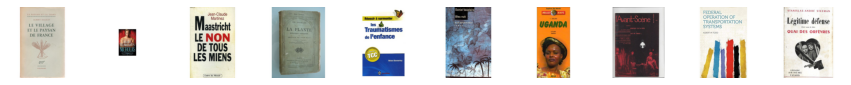

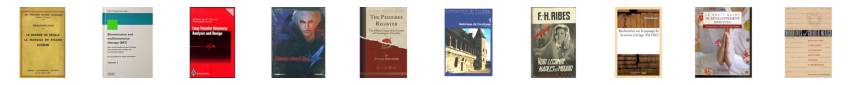

========================>  40


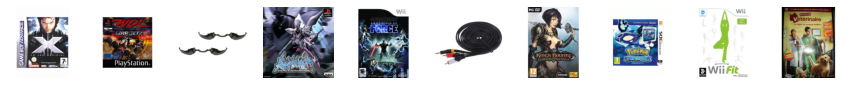

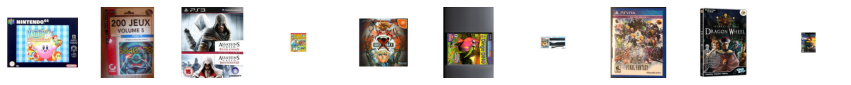

========================>  50


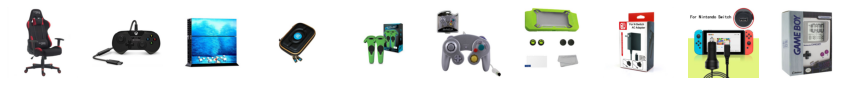

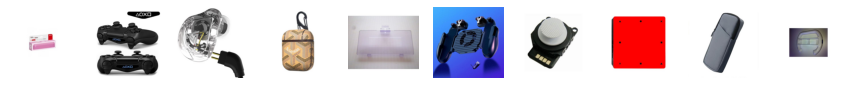

========================>  60


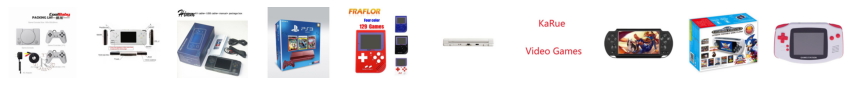

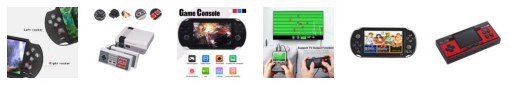

========================>  1140


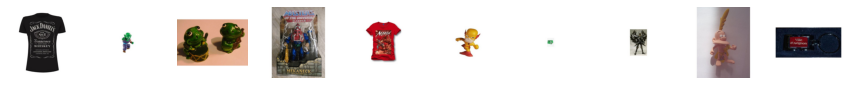

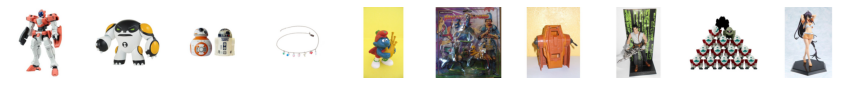

========================>  1160


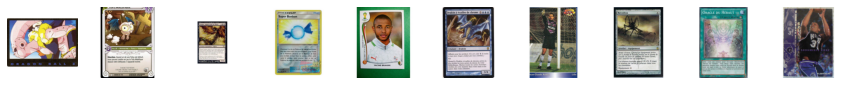

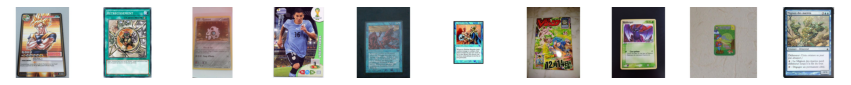

========================>  1180


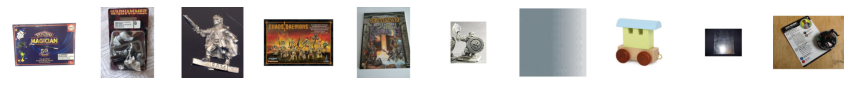

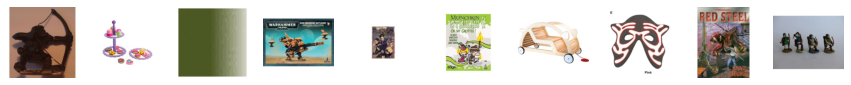

========================>  1280


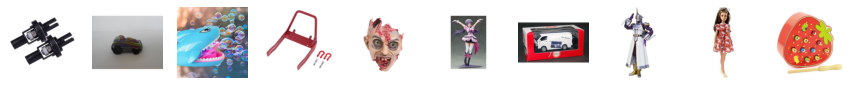

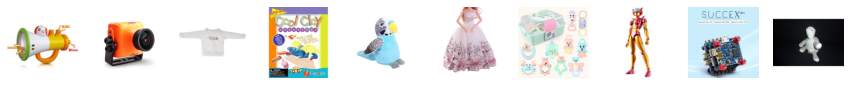

========================>  1281


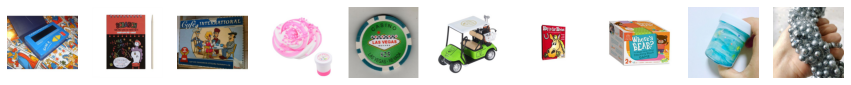

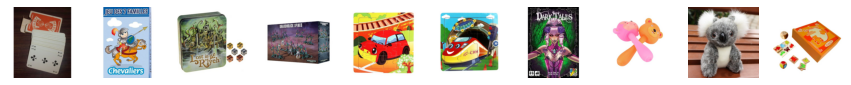

========================>  1300


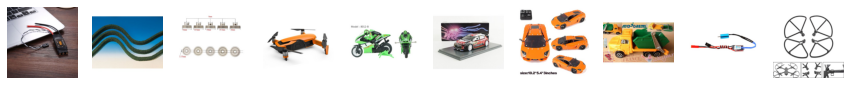

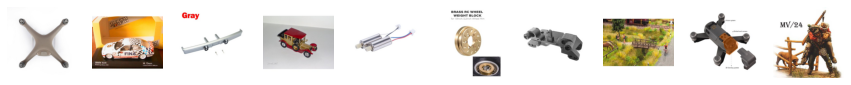

========================>  1301


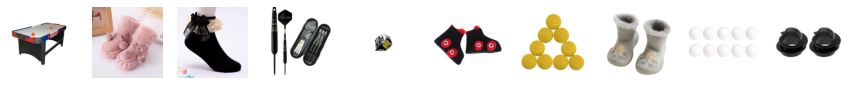

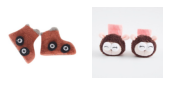

========================>  1302


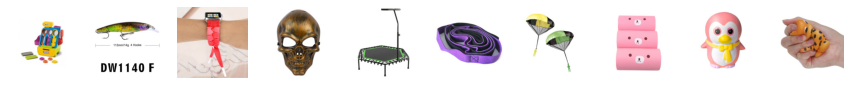

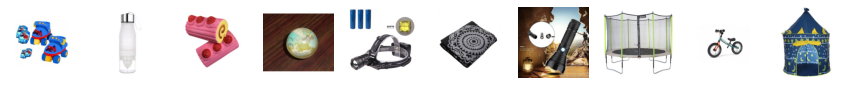

========================>  1320


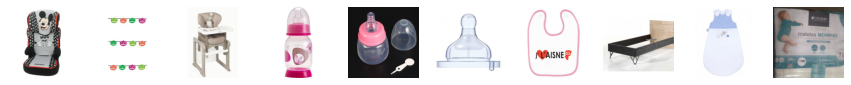

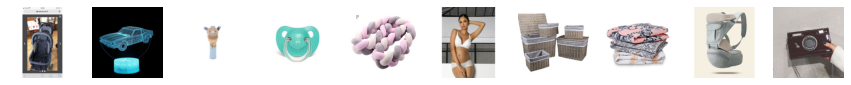

========================>  1560


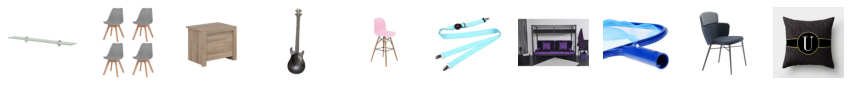

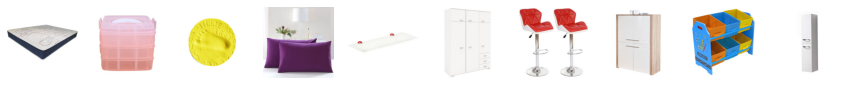

========================>  1920


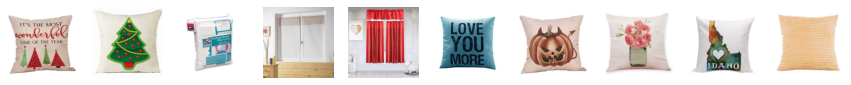

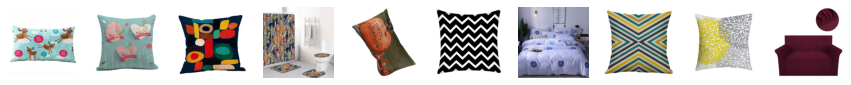

========================>  1940


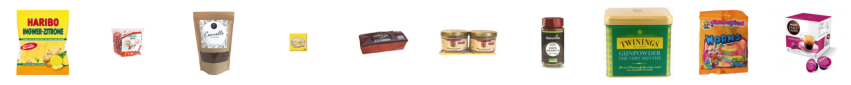

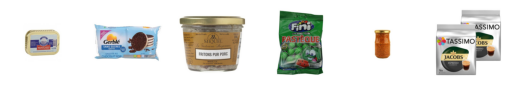

========================>  2060


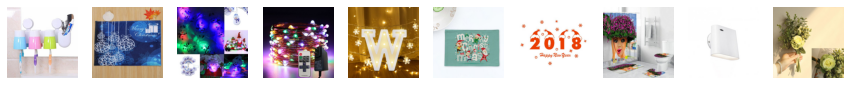

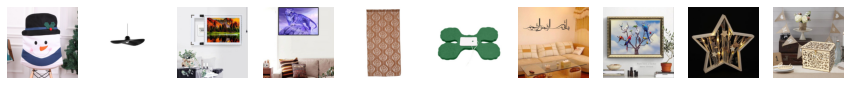

========================>  2220


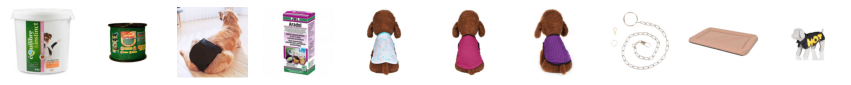

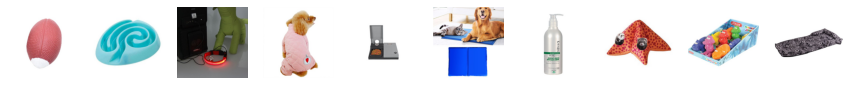

========================>  2280


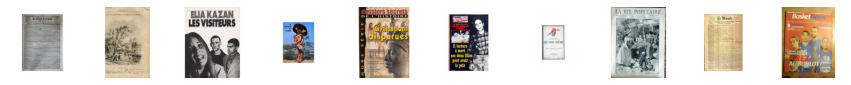

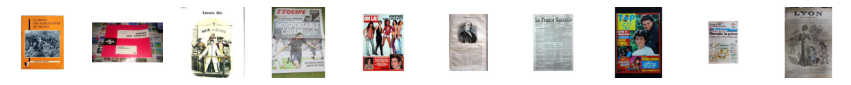

========================>  2403


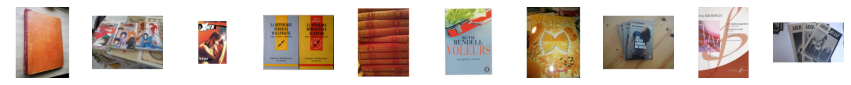

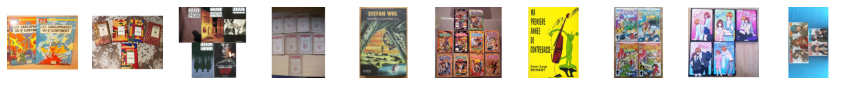

========================>  2462


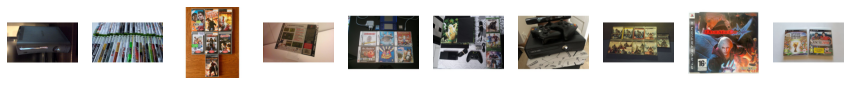

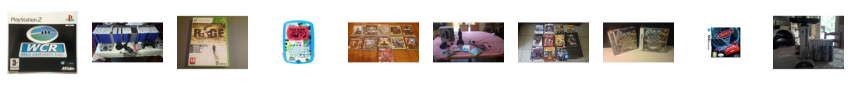

========================>  2522


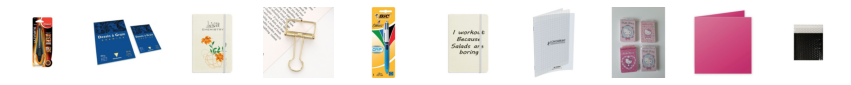

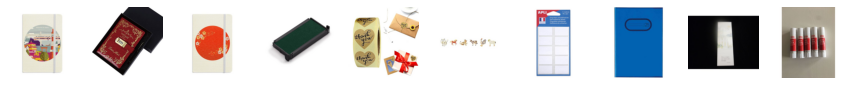

========================>  2582


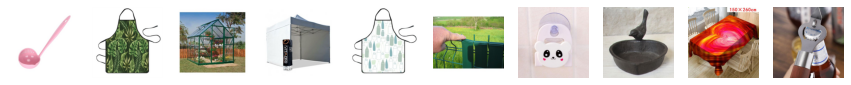

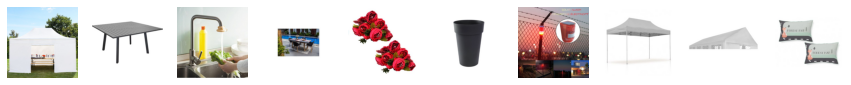

========================>  2583


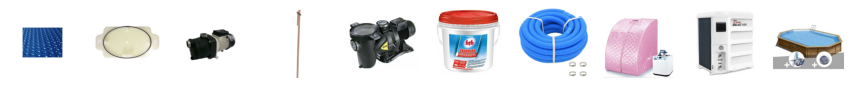

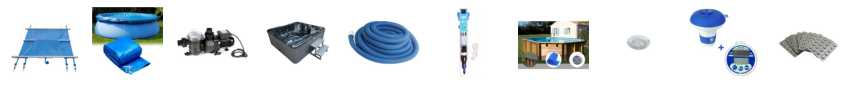

========================>  2585


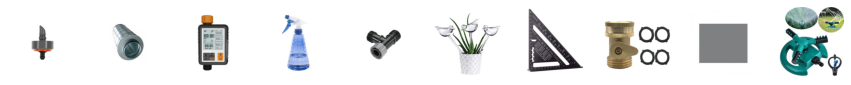

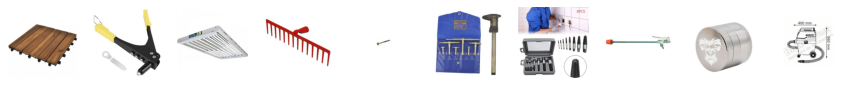

========================>  2705


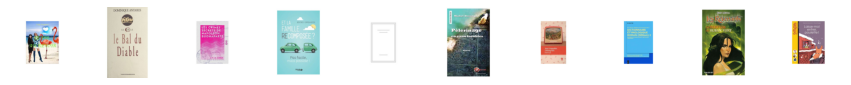

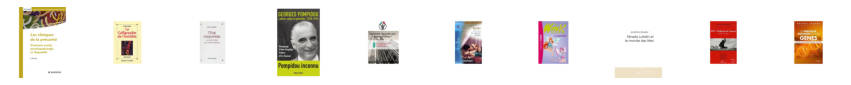

========================>  2905


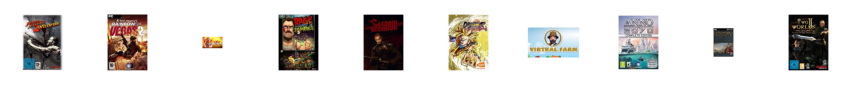

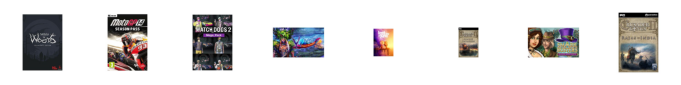

In [7]:
# 
# Aperçu des différents types
#

X, y = read_X_y(2000)
X, y = shuffle(X, y)

for prdtypecode in sorted(list(y.unique())):
    print(f"========================>  {prdtypecode}")
    Xim = get_images(X[y == prdtypecode])[:20]
    display_images(Xim)


clusters = 3 silhouette = 0.569 , done in 73 sec
==============================   0   ==============================


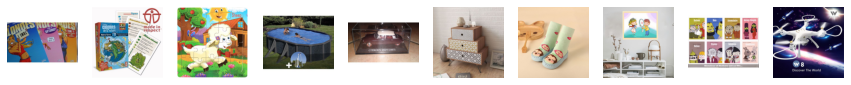

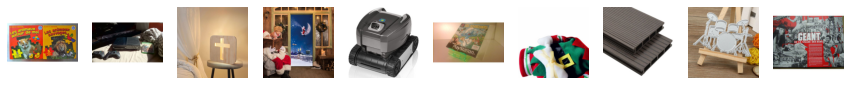

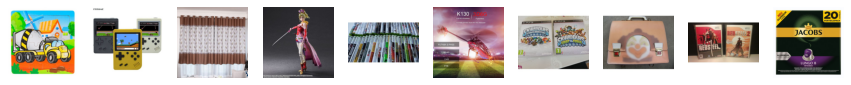

==============================   1   ==============================


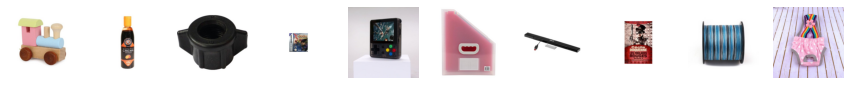

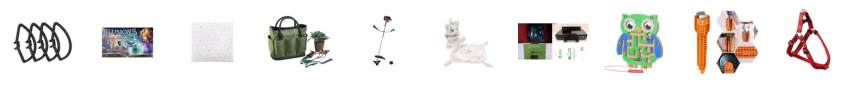

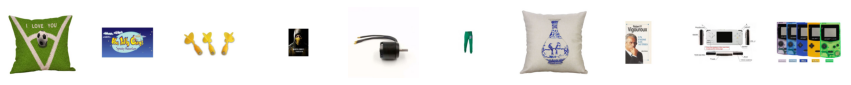

==============================   2   ==============================


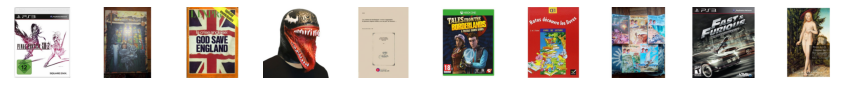

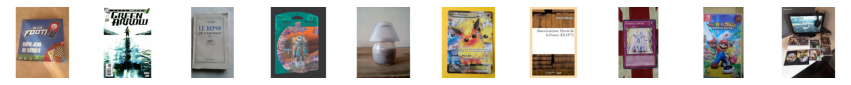

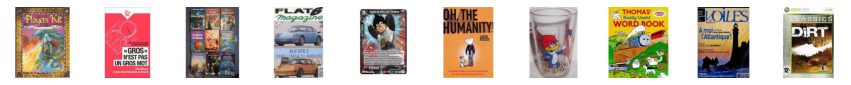

In [5]:
#
# Partitionnement en 3 clusters ave LLE et KMeans
#

X0, y0 = read_X_y(25000)
X0, y0 = shuffle(X0, y0)
minnb = 20
X = None
y = None
for t in y0.unique():
    Xt = X0[y0 == t][:minnb]
    yt = y0[y0 == t][:minnb]
    X = Xt if X is None else pd.concat([X, Xt], axis=0)
    y = yt if y is None else pd.concat([y, yt])
X0, y0 = shuffle(X, y)

t0 = time.time()
X = get_images(X0).reshape(X0.shape[0], -1)
X = StandardScaler().fit_transform(X)
X = LocallyLinearEmbedding(n_components=3, n_neighbors=10).fit_transform(X)
kmeans = KMeans(n_clusters=3)
yc = kmeans.fit_predict(X)
t1 = time.time()
nclusters = len(set(yc))
noises = np.sum(yc == -1)

score = metrics.silhouette_score(X, kmeans.labels_,
                                 metric="euclidean")
print(f"clusters = {nclusters} silhouette = {round(score, 3)} , done in {int(t1-t0)} sec")

for cluster in sorted(list(set(yc))):
    print("=" * 30, " ",cluster," ","=" * 30)
    Ximage = get_images(X0[yc == cluster])[:30]
    yimage = y[yc == cluster][:30]
    display_images(Ximage)
